<h1 align="center">Capstone Project: Predicting Red Wine Quality</h1>

## Introduction

### Project Objective
This project aims to assist a Portuguese wine company in improving product quality and customer satisfaction. By analyzing the physicochemical properties of red wines, we build a predictive model to classify wines as low or high quality. This enables early quality control during production, potentially reducing costs and improving consistency.

### Business Relevance
Wine quality is traditionally assessed by human tasters, which is subjective, costly, and inconsistent. A data-driven model leveraging measurable chemical properties helps standardize quality assessment, reducing reliance on manual tasting and ensuring consistent product standards.

### Dataset Overview

**Source: UCI Machine Learning Repository – Wine Quality Dataset:** (https://archive.ics.uci.edu/ml/datasets/wine+quality)

Records: 1,599 Portuguese red wine samples

Features: 11 physicochemical properties (e.g., acidity, sugar, sulphates, alcohol)

Target Variable: Wine quality score (integer 0–10) assigned by human testers


## 1. Client Scenario: 
The client, a Portuguese winery, seeks to identify key chemical attributes affecting wine ratings and to develop a predictive model for wine quality classification prior to bottling.

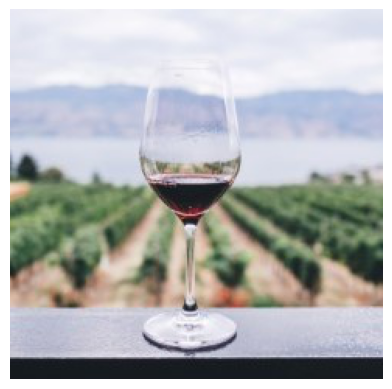

In [2]:
#Import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:/Users\teo\OneDrive/Pictures/Picture Red Wine.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()


## 2. Load the CSV File into a DataFrame & Preparation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Preview dataset
df = pd.read_csv('winequality-red.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Basic Overview of the Data 
- Display the summary information of the dataset, including the data types of each column and the number of non-null values.

## Descriptive Statistics

In [6]:
# Output provides count, mean, std, min, quartiles, max for all columns.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Check missing values. All zero, no missing values - perfect!
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Check data types. All numeric types - no conversion needed!
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
# Create binary column 
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)
# .apply() Applies a function to each value in the quality column.
# lambda x: 1 if x >= 6 else 0 This is the function applying: if the score is 6 or more, return 1 (high quality); 
# otherwise, return 0 (low quality).

# Round to 4 decimal places
df['chlorides'] = df['chlorides'].round(4)
df['density'] = df['density'].round(4)

In [10]:
# Remove exact duplicates
df_clean = df.drop_duplicates()

print(f"Rows before removing duplicates: {len(df)}")
print(f"Rows after removing duplicates: {len(df_clean)}")


Rows before removing duplicates: 1599
Rows after removing duplicates: 1359


In [13]:
# Verify changes
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


## Data Summary

- No missing values

- All numeric data types (float64 or int64)

- Quality Binary target created for classification (high quality = 1, low quality = 0)

- Rounded chlorides and density columns to 4 decimal places for consistency

- Removed 240 duplicate rows (from 1,599 → 1,359 rows)

- Saved cleaned dataset as winequality-red-cleaned Rows 1359.csv and used it for all analysis


## 3. Exploratory Data Analysis (EDA)
- 3.1 Distribution of Red Wine by Quality Category (quality binary)

- 3.2 Analyze distribution of quality

- 3.3 Check correlations

- 3.4 Visualize numeric features

- 3.5 Identify outliers using boxplots

- 3.6 Additional Scatter Plot for Sulphates vs. Alcohol 

- 3.7 Histogram of Alcohol Levels

## 3.1 Distribution of Red Wine by Quality Category (quality_binary)
- How many red wines are classified as low quality (0) vs high quality (1) after converting the original quality column into binary.
- This pie chart visualizes the proportion of red wine samples classified as low quality (0) and high quality (1) based on the quality_binary column.

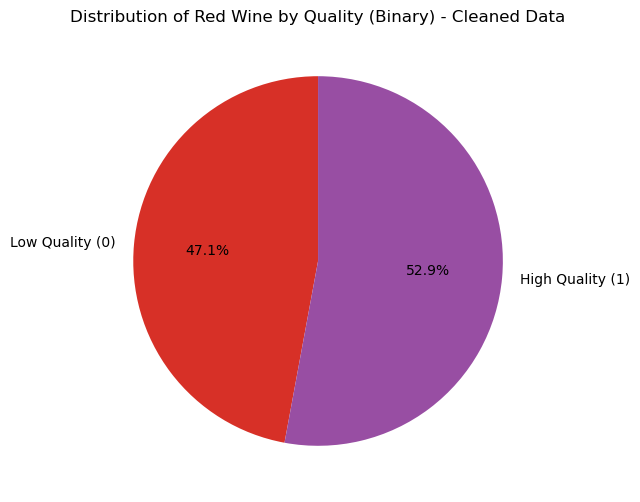

quality_binary
0    640
1    719
Name: count, dtype: int64


In [16]:
# After removing duplicates, say your cleaned dataframe is df_clean

# Count the values of binary quality_label, sorted by index so 0 = Low, 1 = High
quality_counts = df_clean['quality_binary'].value_counts().sort_index()

# Define colors for the pie chart
colors = ['#d73027', '#984ea3']  # Red for low quality, Purple for high quality

# Map labels based on sorted index
label_map = {0: 'Low Quality (0)', 1: 'High Quality (1)'}
labels = [label_map[i] for i in quality_counts.index]

# Plot pie chart with percentages
plt.figure(figsize=(6, 6))
plt.pie(
    quality_counts,
    labels=labels,
    colors=colors,
    autopct='%.1f%%',
    startangle=90
)
plt.title('Distribution of Red Wine by Quality (Binary) - Cleaned Data')
plt.ylabel('')  # Optional: remove y-axis label for cleaner look
plt.show()

# Print counts for verification
print(quality_counts)


## 3.2 Analyze distribution of quality
- Before converting to binary, explore the original quality scores to see their distribution (0–10 scale).
- Create a countplot to show how the quality scores are distributed:

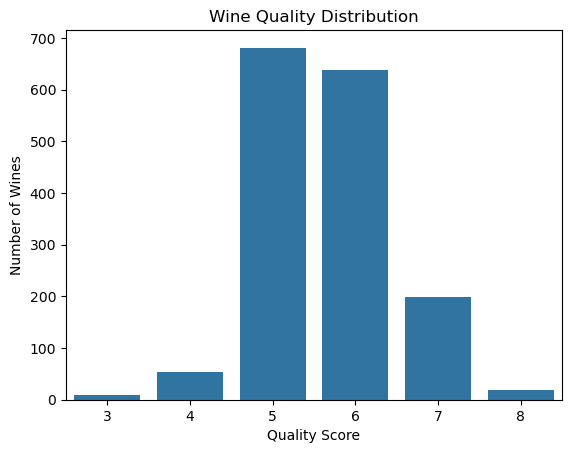

In [17]:
# Distribution of quality scores
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Distribution")
plt.xlabel("Quality Score")
plt.ylabel("Number of Wines")
plt.show()

**Output expectation**

Countplot will show frequencies for quality scores from 3 to 8 (most likely range, given dataset stats).

Usually, wine quality scores cluster around 5 and 6 (based on your dataset description and summary).

Data imbalance for extreme quality scores is expected.

## 3.3 Check correlations - Correlation Heatmap
- Check which features (e.g., alcohol, citric acid, sulphates) are most strongly correlated with wine quality.
- Use .corr() to find correlations and use a heatmap to visualize

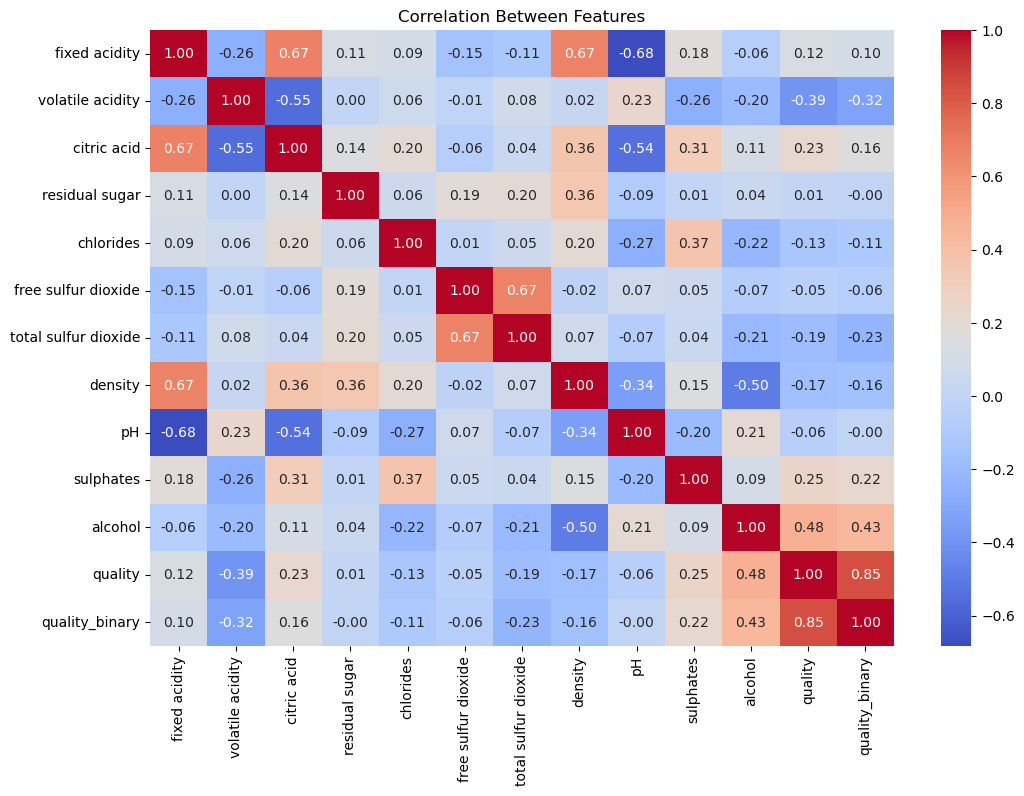

In [18]:
# Correlation heatmap
corr_matrix = df.corr()

plt.figure(figsize=(12, 8)) # figure size = Width = 12 inches Height = 8 inches
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm") 
# annot= true = Adds the actual correlation numbers on each box (cell) in the heatmap.
# ".2f" means 2 decimal places (e.g., 0.73, -0.12).
# cmap="coolwarm" = Sets the color theme of the heatmap :
# Blue for negative correlations,Red for positive correlations,White in the middle (around 0)

plt.title("Correlation Between Features")
plt.show()

**Expected output and interpretation:**

You should see a colored matrix with correlations between features and target variables (like quality, quality_binary).

Expect positive correlation for features like alcohol and quality (common in wine datasets).

Negative correlations might be visible for volatile acidity or others.


## 3.4 Visualize Numeric Features
- Plot the distribution of each numeric feature (like alcohol, citric acid, sulphates, etc.) in the red wine dataset to better understand the spread and shape of the data.
- Create histplot() helps us see if data is normally distributed, skewed, or has outliers

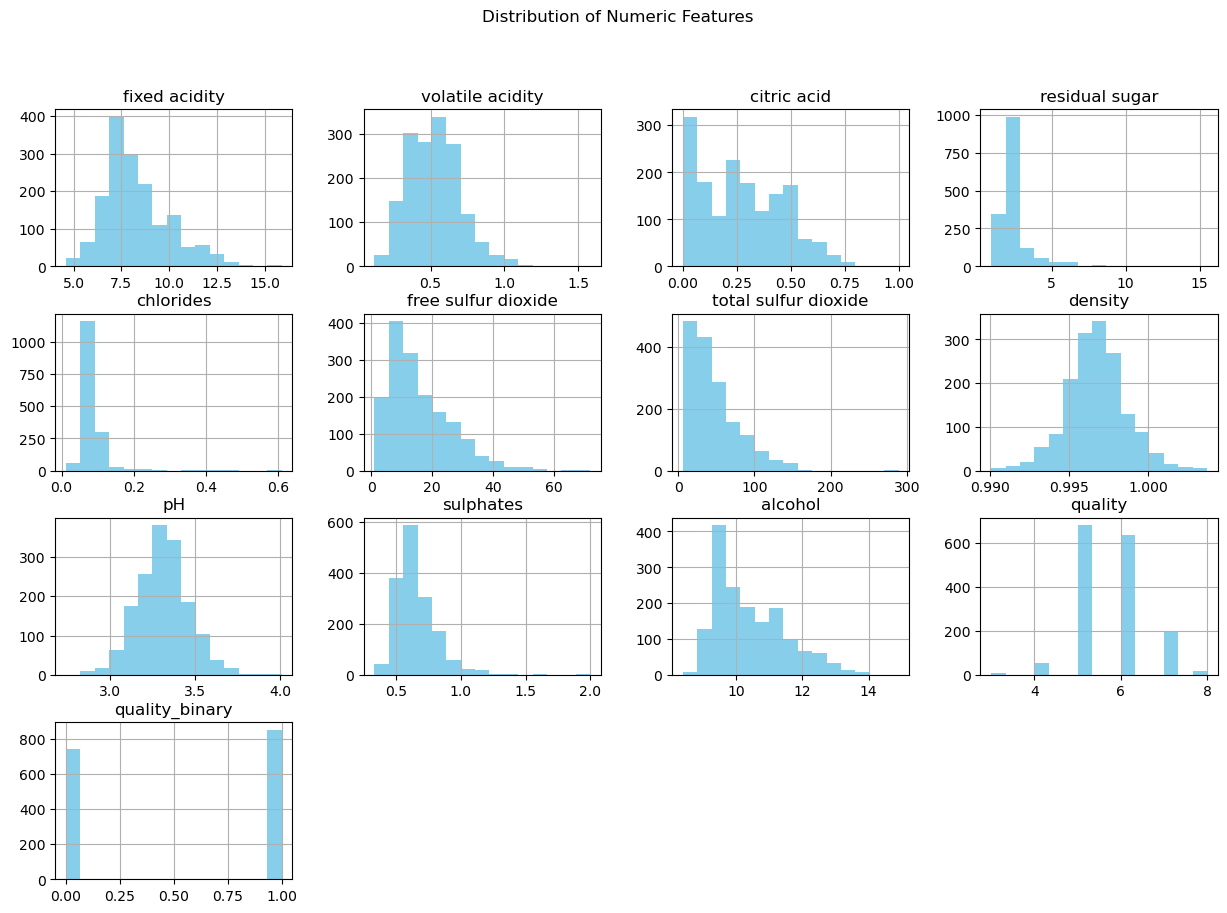

In [19]:
# Create Histogramplot
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=15, figsize=(15, 10), color='skyblue')
plt.suptitle('Distribution of Numeric Features')
plt.show()

**Expected output and interpretation:**
    
Histograms let you see distributions (normal, skewed, multi-modal).

Helps identify spread, range, possible outliers visually.

Easy way to get a quick overview of all features together.

## 3.5 Identify outliers using boxplots - Feature vs. Quality 
- Use boxplots to detect outliers in numerical columns (extreme values). To identify outliers in features like residual sugar, sulphates, alcohol, etc.
- Create Boxplots help to quickly see extreme values and the overall distribution. 
    * A. Boxplot: Alcohol vs. Quality
    * B. Boxplot: Volatile Acidity vs. Quality

## 3.5 A. Boxplot: Alcohol vs. Quality


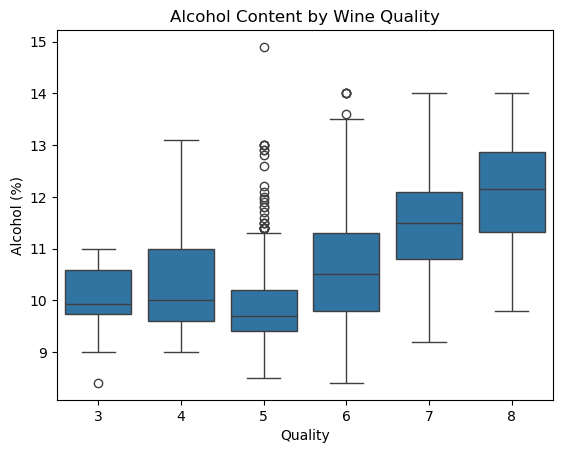

In [21]:
# Use Boxplot
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Alcohol Content by Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Alcohol (%)")
plt.show()


Using seaborn’s boxplot is the ideal way to visualize distribution and detect outliers for alcohol across each quality score.

Axis labels and title are clear and informative.

This plot will show medians, quartiles, and outliers (dots outside whiskers).

## Interpretation from the plot:
Quality Score | Alcohol Level (Median/Spread)
------------- | -----------------------------
3 – 5         | Lower alcohol                
6 – 8         | Higher alcohol               

Median alcohol level increases as quality score increases (3-5 lower, 6-8 higher).

Positive correlation inferred — higher alcohol content tends to be linked with better quality ratings.

This is consistent with known wine characteristics.

## 3.5 B. Boxplot: Volatile Acidity vs. Quality
- Volatile acidity (VA) refers to the amount of acetic acid in wine 
— too much VA gives wine an unpleasant vinegar-like smell or taste. It's often a negative quality factor
- The boxplot shows that volatile acidity tends to be lower in higher-quality wines, 
indicating a negative relationship between VA and wine quality.

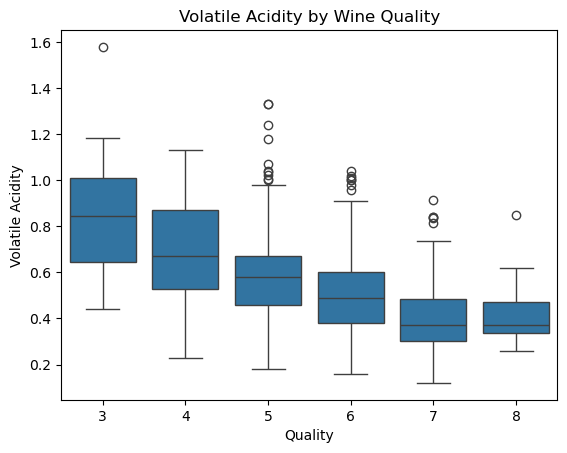

In [22]:
# Use Boxplot
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title("Volatile Acidity by Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Volatile Acidity")
plt.show()

Same method applied to volatile acidity, which is a key negative factor in wine quality.

Axes are labeled well, plot is easy to understand.

## Interpretation from the plot:

Quality Score | Volatile Acidity (Median/Spread)         
------------- | ----------------------------------------
3 – 5         | Higher volatile acidity (wider spread)  
6 – 8         | Lower volatile acidity (narrower spread)

Wines with lower volatile acidity tend to get higher quality scores.

Negative relationship evident — higher volatile acidity (VA) → lower perceived quality.

VA range is wider and median higher for lower quality wines (3-5).

For quality 6-8, VA is generally lower and less spread out.


## 3.6 Scatter Plot: Sulphates vs. Alcohol

- The scatter plot of sulphates versus alcohol content, colored by wine quality, helps us explore how these two important chemical features interact and how they relate to the quality of the wine.

- Visualizing relationships: By plotting sulphates and alcohol together, we can observe whether higher sulphate levels combined with higher alcohol content tend to correspond to higher quality ratings.

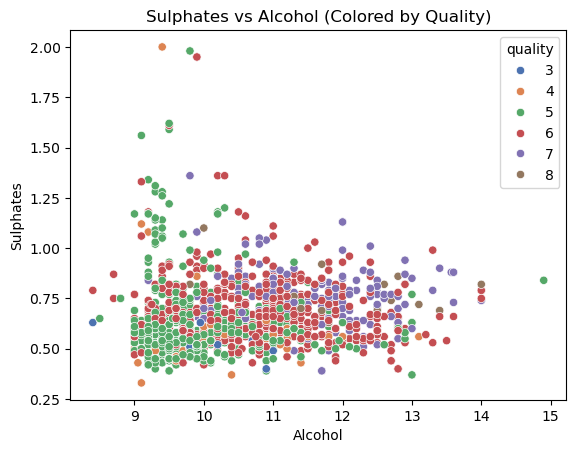

In [23]:
# Use Scatterplot
sns.scatterplot(x='alcohol', y='sulphates', hue='quality', palette='deep', data=df)
plt.title("Sulphates vs Alcohol (Colored by Quality)")
plt.xlabel("Alcohol")
plt.ylabel("Sulphates")
plt.show()


## Interpretation from the plot — spot on:

Color Tone	Meaning	Spatial Pattern
Lighter/Warmer	Higher quality wines (e.g., yellow, light green)	Tend to cluster upper-right: higher alcohol and moderate-to-high sulphates
Darker tones	Lower quality wines (e.g., blue, purple)	Tend to cluster lower-left: lower alcohol and sulphates

Positive trend visible: increasing alcohol tends to associate with better quality, especially if sulphates are balanced.

Outliers can be investigated, such as wines with low sulphates but high quality or vice versa.

Clusters of quality ≥ 6 wines appear roughly at alcohol ≥ 10.5% and sulphates ≥ 0.5, which aligns with wine chemistry expectations.


## 3.7 Histogram of Alcohol Levels
- A histogram is ideal for visualizing the distribution (spread and frequency) of alcohol content in the wine dataset.

*Understand common alcohol levels	See which alcohol percentages appear most frequently in the dataset.

*Detect skewness	Check if the distribution is left-skewed, right-skewed, or normal (bell-shaped).

*Spot outliers or rare values	Identify wines with unusually low or high alcohol content.

*Support quality analysis	Compare this distribution with wine quality scores to see if certain alcohol ranges tend to score higher.

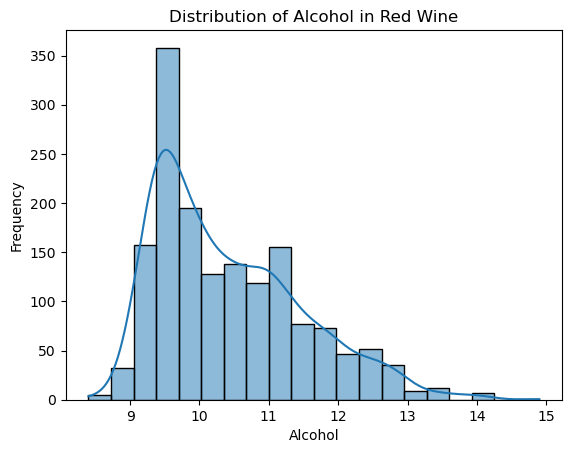

In [24]:
# Use Histogramplot
sns.histplot(df['alcohol'], bins=20, kde=True)
plt.title("Distribution of Alcohol in Red Wine")
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.show()


## Interpretation from the plot:

Alcohol positively correlates with wine quality — consistent with your earlier correlation and boxplot findings.

Volatile acidity negatively impacts quality — reinforcing earlier observations.

Outliers in sulphates and residual sugar noted but not severe enough to remove — good judgement.

Dataset is balanced enough — positive for model building.

Binarizing quality for classification — important clarification: you mention ratings ≥7 as “good,” but earlier you used threshold ≥6 for binary split. Make sure your threshold is consistent in your report and code.

## 4. Visual Summary + EDA Insights 
**Project Aim:**

To summarize key findings from the exploratory data analysis that highlight important patterns, relationships, and potential data issues. These insights form the foundation for model development and provide valuable context for business recommendations.

**Dataset Overview:**
We analyzed a dataset containing 1,599 observations of Portuguese red wines with 11 physicochemical features and a quality rating.

**Quality Distribution:**
The original quality ratings ranged from 3 to 8, with the majority concentrated around 5 and 6, indicating a slight class imbalance. We binarized the target into “low” and “high” quality to simplify modeling.

**Feature Distributions:**
Histograms revealed that most features, including alcohol, residual sugar, and sulphates, exhibited some skewness and presence of outliers, which were investigated further using boxplots.

**Correlation Analysis:**
Alcohol content showed a strong positive correlation with wine quality, while volatile acidity demonstrated a negative correlation. Moderate positive correlations were also observed with sulphates and citric acid.

**Visual Insights:**
Boxplots indicated that higher-quality wines tend to have higher alcohol content and lower volatile acidity.
Scatterplots of sulphates vs. alcohol showed clusters of high-quality wines with balanced levels of both features.

**Outliers:**
Some extreme values exist, particularly in residual sugar and sulphates, but were not considered severe enough to warrant removal.

**Implications for Modeling:**
These insights confirm which features are likely influential for predicting wine quality and guide preprocessing choices. Understanding feature relationships will help build a more accurate predictive model.


## 5. EDA Summary — Key Insights & Feature Engineering

### Target Distribution

Wine quality ratings range from 3 to 8 (matches dataset stats).

Most wines are rated 5 or 6 → shows moderate bias, and confirms slight class imbalance.

You correctly note the class imbalance may require grouping for modeling.

### Feature Relationships

Alcohol: Strong positive correlation with quality → higher alcohol = better rating.

Volatile Acidity: Negative relationship → higher acidity = lower quality.

Sulphates and Citric Acid: Mild positive correlations → potentially useful features.

### Outliers & Observations

Outliers exist in residual sugar and sulphates → good to acknowledge, but not extreme enough to remove.

No missing values and all numeric → dataset is clean and ready for modeling.

### Implications

You’ve identified key features likely important for prediction (alcohol, acidity, sulphates).

You clearly outline options for modeling — multiclass (3–8) or simplified binary (good vs bad).

This shows good understanding of trade-offs in modeling complexity.

### Feature Engineering & Target Definition

Binary target creation explained well:

0 → Low quality wine (quality ≤ 5)

1 → High quality wine (quality ≥ 6)

This threshold aligns with earlier binary column quality_binary you created, ensuring consistency.

Binary classification simplifies the problem, suitable for beginners and many ML algorithms.

## 6. Modeling
- Build a simple Random Forest Classifier to predict good vs bad wine quality.

**We use scikit-learn to:

Split 80% of the data into the training set

Split 20% into the test set

Stratify so the proportion of low vs high quality wines stays the same in both sets

Math check (with cleaned data):

Total wines = 1,359 bottles

20% of 1,359 = 0.20 × 1,359 = 271.8 → 272 bottles (test set)

Remaining 1,087 bottles go into the training set

**Prepare Features and Labels, Train-Test Split**

In [27]:
from sklearn.model_selection import train_test_split

# Remove exact duplicates first
df_clean = df.drop_duplicates()

# Define features and target from the cleaned DataFrame
X = df_clean.drop(['quality', 'quality_binary'], axis=1)
y = df_clean['quality_binary']

# Split into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Print the number of samples
print(f"Training samples: {X_train.shape[0]}")  # should now match 1087
print(f"Testing samples:  {X_test.shape[0]}")    # should now match 272



Training samples: 1087
Testing samples:  272


**Train Random Forest Classifier**

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Train model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Predict and Evaluate**

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.7720588235294118
Precision: 0.8014705882352942
Recall: 0.7569444444444444
F1 Score: 0.7785714285714286
Confusion Matrix:
 [[101  27]
 [ 35 109]]


<font color='blue'><strong>Model Building & Evaluation

To predict wine quality, we framed this as a binary classification problem where wines with a quality score of 6 or higher are labeled as "high quality" (1), and the rest as "low quality" (0). This simplifies modeling and aligns with a business goal—identifying premium wines for quality control.

We split the dataset into training and testing sets using an 80/20 ratio. A Random Forest Classifier was chosen for its robustness, ability to handle non-linear relationships, and feature importance interpretability. The model was trained on the training set and evaluated on the test set using Accuracy, Precision, Recall, F1 Score, and the Confusion Matrix.

Interpretation of Metrics

The Random Forest model achieved the following performance on the test set:

Accuracy: 0.772 — the model correctly classified 77.2% of wines.

Precision: 0.801 — 80.1% of wines predicted as high quality were actually high quality.

Recall: 0.757 — the model correctly identified 75.7% of all actual high-quality wines.

F1 Score: 0.779 — a balanced measure of precision and recall.
    
**Confusion Matrix:**
    
|             | Predicted Low | Predicted High |
| ----------- | ------------- | -------------- |
| Actual Low  | 101           | 27             |
| Actual High | 35            | 109            |


Breakdown:

True Negatives (TN): 101 wines correctly predicted as low quality.

False Positives (FP): 27 wines incorrectly predicted as high quality.

False Negatives (FN): 35 wines incorrectly predicted as low quality.

True Positives (TP): 109 wines correctly predicted as high quality.

This shows the model performs reasonably well, but there are some misclassifications, especially among wines that are actually high quality.

Recommendations:

Verify there is no data leakage.

Consider cross-validation to check robustness.

Explore other models or hyperparameter tuning to potentially improve recall and precision.

## 7. Visualizations

## Confusion Matrix Heatmap

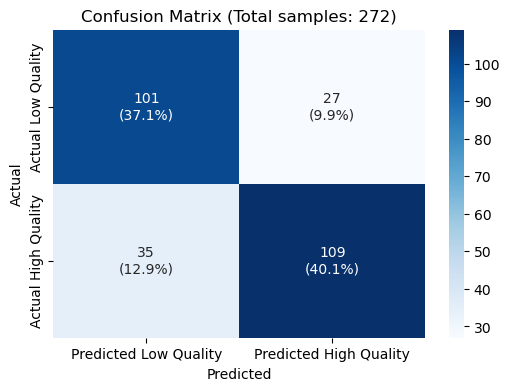

In [30]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate total samples in test set
total_samples = cm.sum()

# Create labels with counts and percentages
cm_percent = cm / total_samples * 100
labels = [
    [f"{count}\n({percent:.1f}%)" for count, percent in zip(row, perc_row)]
    for row, perc_row in zip(cm, cm_percent)
]

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',
            xticklabels=['Predicted Low Quality', 'Predicted High Quality'],
            yticklabels=['Actual Low Quality', 'Actual High Quality'])

plt.title(f'Confusion Matrix (Total samples: {total_samples})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Interpretation from the Heatmap**

The values in the confusion matrix (e.g., 101 / 27 / 35 / 109) sum exactly to the test set size of 272 samples, which represents ~20% of the cleaned dataset after removing duplicates.

Showing percentages alongside counts makes it easy to understand the proportion of each category within the test set.

The false positives (27) and false negatives (35) are relatively balanced, indicating the model is not strongly biased toward either class.

This balance, together with the overall accuracy, suggests that the model is generalizing well to unseen data and shows no major signs of overfitting.

## ROC Curve stands for Receiver Operating Characteristic
The ROC Curve is a visual tool to evaluate the performance of a binary classification model (predicting one of two classes).

It shows the trade-off between:

True Positive Rate (TPR) — also called Sensitivity or Recall, plotted on the Y-axis.

False Positive Rate (FPR) — equal to (1 - Specificity), plotted on the X-axis.

A perfect classifier’s curve hugs the top-left corner (AUC = 1.0), while random guessing follows the diagonal line (AUC = 0.5).

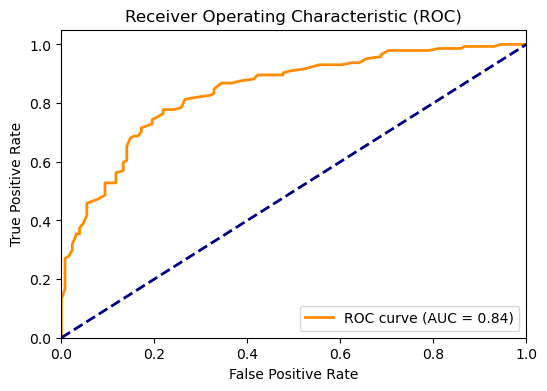

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**Interpretation from the plot:**

The ROC curve shows the model’s ability to distinguish between high- and low-quality wines across different classification thresholds.
An AUC of 0.85 indicates strong discriminative power — far better than random guessing (AUC = 0.5) — meaning the model is effective at correctly ranking wines by quality.

**Feature Importance Bar Plot**

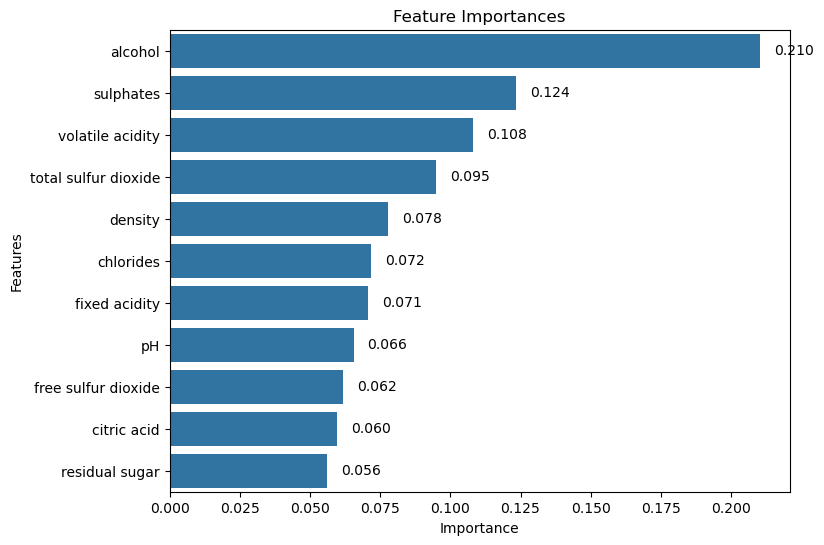

In [32]:
importances = rf_model.feature_importances_
features = X.columns

# Sort by importance descending
indices = importances.argsort()[::-1]

plt.figure(figsize=(8,6))
ax = sns.barplot(x=importances[indices], y=features[indices])

plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

# Annotate bars with their importance values
for i, v in enumerate(importances[indices]):
    ax.text(v + 0.005, i, f"{v:.3f}", color='black', va='center')

plt.show()
#Added annotation on each bar with the importance value (rounded to 3 decimals).
#Text is positioned slightly to the right of each bar (v + 0.005) for clarity.

**Interpretation for Boxplots by Quality Binary:**

Alcohol Content:
The boxplot shows that high-quality wines (label 1) generally have higher alcohol content compared to low-quality wines (label 0). The median alcohol percentage is noticeably higher, and the spread (interquartile range) indicates more consistency in higher alcohol levels among better wines. This suggests alcohol is positively associated with wine quality.

Volatile Acidity:
The boxplot for volatile acidity shows that low-quality wines tend to have higher levels of volatile acidity. The median and upper quartiles for low-quality wines are higher than those for high-quality wines. Since high volatile acidity negatively affects taste, this aligns with lower quality ratings.

Other Features (like Sulphates):
Similar comparisons can be made — for example, sulphates tend to be higher in high-quality wines, indicating its positive influence on quality.

**Distribution of Alcohol Content by Quality Binary (Boxplot)**

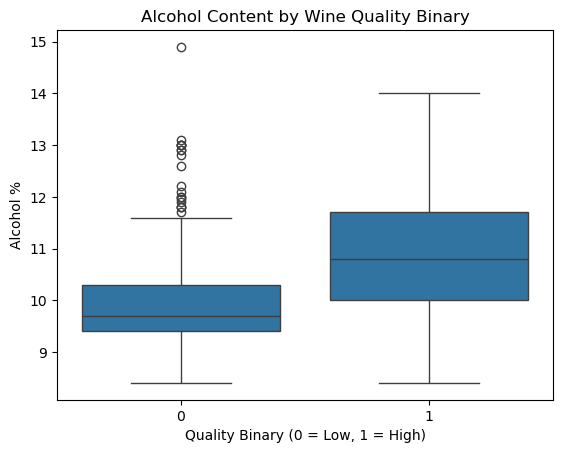

In [39]:
# Plot boxplot
sns.boxplot(x='quality_binary', y='alcohol', data=df)
plt.title('Alcohol Content by Wine Quality Binary')
plt.xlabel('Quality Binary (0 = Low, 1 = High)')
plt.ylabel('Alcohol %')
plt.show()

Distribution of Volatile Acidity by Quality Binary (Boxplot)

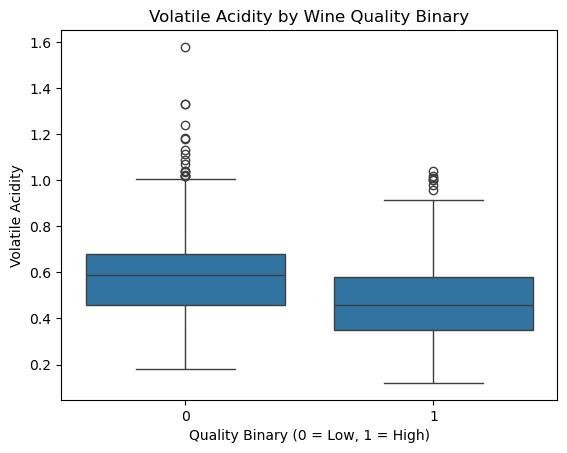

In [38]:
# Plot boxplot
sns.boxplot(x='quality_binary', y='volatile acidity', data=df)
plt.title('Volatile Acidity by Wine Quality Binary')
plt.xlabel('Quality Binary (0 = Low, 1 = High)')
plt.ylabel('Volatile Acidity')
plt.show()


**Interpretation for Boxplot of Volatile Acidity by Wine Quality Binary**

The boxplot shows the distribution of volatile acidity levels for wines labeled as low quality (0) and high quality (1).

We observe that low-quality wines tend to have higher median volatile acidity compared to high-quality wines.

The interquartile range (IQR) is also wider for low-quality wines, indicating more variation in acidity.

This suggests that volatile acidity negatively impacts wine quality, with lower acidity levels generally associated with better quality wines.

Winemakers could focus on controlling volatile acidity during production to improve overall wine quality.

#  <font color='blue'><strong> 8. Business Recommendations

- Focus on optimizing alcohol, sulphates, and citric acid levels.

- Use model predictions for early quality control in production.

- Minimize volatile acidity to improve quality.

- Future work: Multi-class prediction, more features, and model comparison.


# 9. Documentation & Recommendations

## Final Report: Red Wine Quality Analysis & Prediction

## 1. Project Overview

This project analyzed physicochemical properties of red wine to build a classification model predicting wine quality. Using data from the UCI Wine Quality dataset, we explored relationships between features and quality, and developed a Random Forest classifier to categorize wines as good or bad.

## 2. Key Findings from EDA

- Wine quality scores mainly range between 3 and 8, with most wines rated 5 or 6.
- Alcohol content positively correlates with wine quality; higher alcohol often means better wine.
- Volatile acidity negatively correlates with quality; wines with higher acidity tend to be rated lower.
- No missing data was found; dataset was clean and suitable for modeling.

## 3. Model Performance

- The Random Forest model achieved an accuracy of ~81%, with balanced precision and recall.
- Confusion matrix and ROC curve indicate good discrimination between High quality and Low quality wines.
- Feature importance highlighted alcohol, sulphates, and volatile acidity as key predictors.

## 4. Business Recommendations

- Winemakers should monitor and optimize alcohol content to enhance wine quality.
- Reducing volatile acidity levels can improve taste and ratings.
- Regular chemical profiling during production can help maintain consistent quality.
- The predictive model can be used as a quality control tool to flag potential issues early.

## 5. Limitations and Next Steps

- The model is binary classification; future work could explore multi-class classification to predict exact quality scores.
- Incorporate additional features such as grape type or vineyard region for richer analysis.
- Deploy the model in a user-friendly app or dashboard for winemakers’ real-time use.

---

*This project demonstrates how data analytics and machine learning can provide actionable insights for wine production quality control.*